In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\iamaf\Downloads\train.csv")
data.head(3)

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16 00:00:00.000000000,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16 00:00:00.000000000,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16 00:00:00.000000000,1.645427,5.456560,1.0,7.389056,2.890372,1


In [3]:
data.shape

(1639424, 7)

## Data Cleaning

In [4]:
print(data.duplicated().sum())

57315


In [5]:
print((data.duplicated().sum() / len(data)) * 100)

3.4960449523735164


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.isnull().sum()

Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1582109 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Date    1582109 non-null  object 
 1   X1      1582109 non-null  float64
 2   X2      1582109 non-null  float64
 3   X3      1582109 non-null  float64
 4   X4      1582109 non-null  float64
 5   X5      1582109 non-null  float64
 6   target  1582109 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.6+ MB


In [9]:
data.describe()

,X1,X2,X3,X4,X5,target
count,1.582109e+06,1.582109e+06,1.582109e+06,1.582109e+06,1.582109e+06,1.582109e+06
mean,1.142747e+00,5.488090e+00,4.259295e+32,2.803710e+29,1.210019e+00,8.869806e-03
std,1.397365e-01,1.345799e-02,2.388275e+35,5.917340e+31,1.310279e+00,9.376107e-02
min,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.053376e+00,5.480472e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.107383e+00,5.488855e+00,1.000000e+00,1.000000e+00,6.931472e-01,0.000000e+00
75%,1.218962e+00,5.496635e+00,1.000000e+00,2.718282e+00,2.890372e+00,0.000000e+00
max,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00,1.000000e+00


# Exploratory Data Analysis

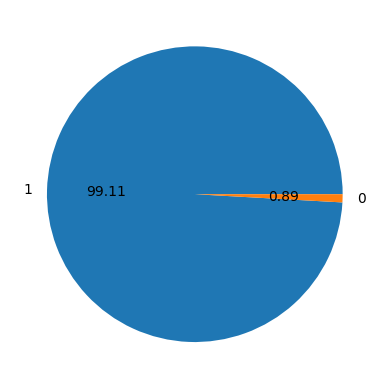

In [10]:
plt.pie(data['target'].value_counts(), labels=['1','0'],autopct="%0.2f")
plt.show()

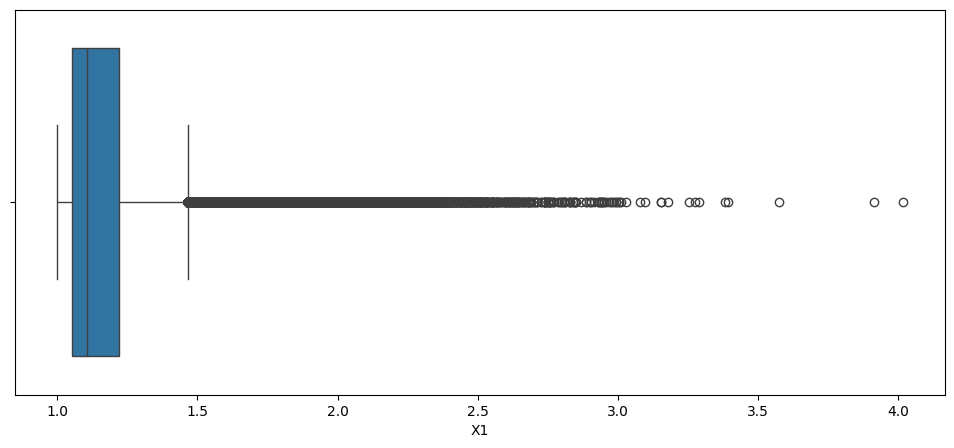

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X1')
plt.show()

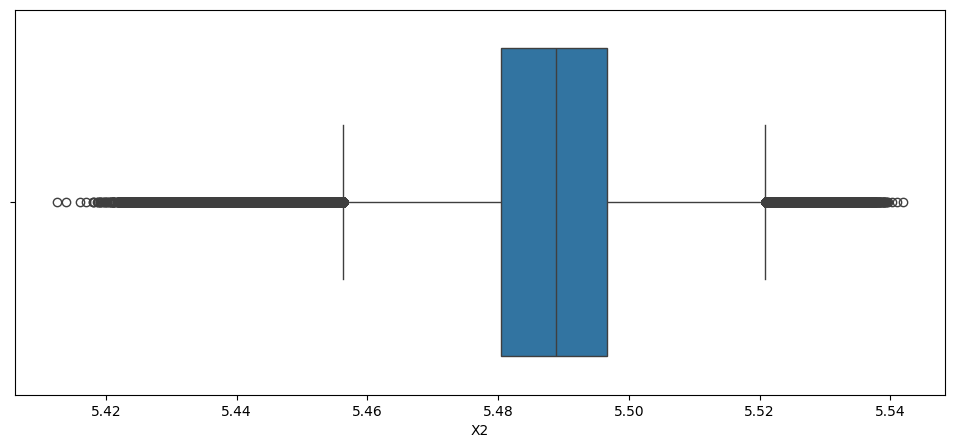

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X2')
plt.show()

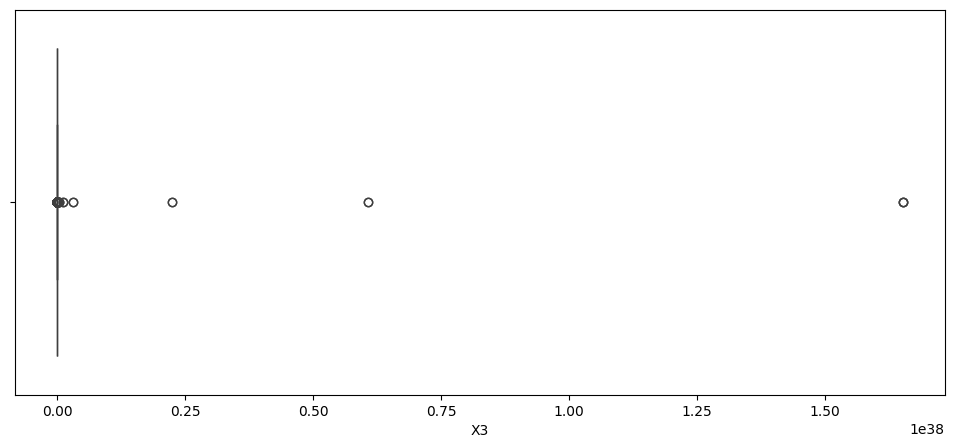

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X3')
plt.show()

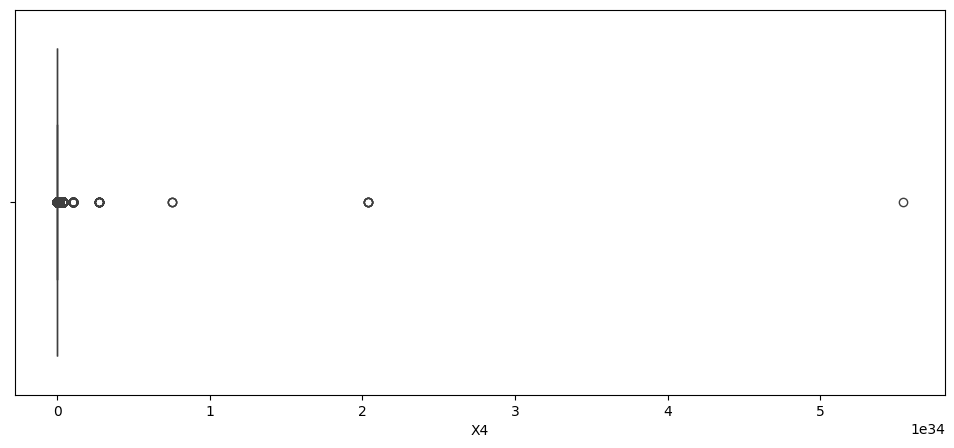

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X4')
plt.show()

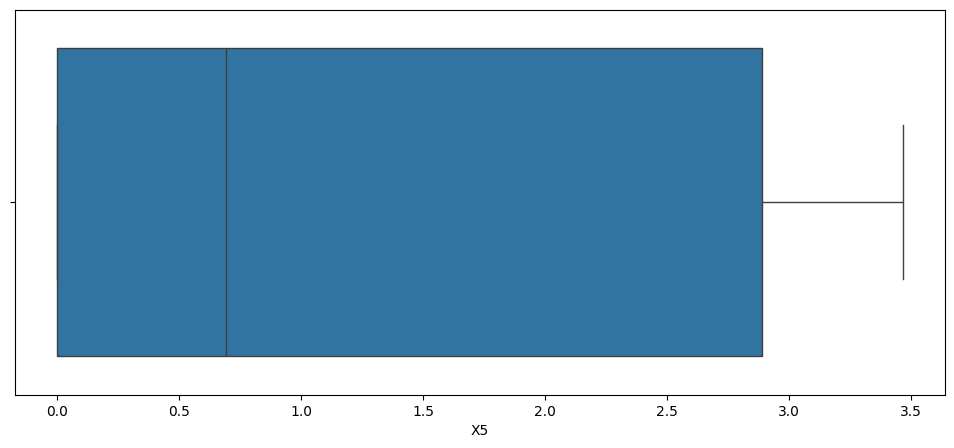

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x = 'X5')
plt.show()

In [16]:
data.shape

(1582109, 7)

In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
def remove_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return data[(data[col] >= lower) & (data[col] <= upper)]


In [19]:
for col in ['X1', 'X2', 'X3', 'X4', 'X5']:
    data = remove_outliers(data, col)

In [20]:
data.describe()

,X1,X2,X3,X4,X5,target
count,1.235546e+06,1.235546e+06,1235546.0,1.235546e+06,1.235546e+06,1.235546e+06
mean,1.116822e+00,5.489659e+00,1.0,1.357398e+00,1.103096e+00,7.518943e-04
std,1.051375e-01,1.185359e-02,0.0,6.974075e-01,1.277874e+00,2.741039e-02
min,1.000000e+00,5.456602e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,5.482346e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.096365e+00,5.490012e+00,1.0,1.000000e+00,6.931472e-01,0.000000e+00
75%,1.178214e+00,5.497455e+00,1.0,1.000000e+00,2.890372e+00,0.000000e+00
max,1.465212e+00,5.520861e+00,1.0,2.718282e+00,3.465736e+00,1.000000e+00


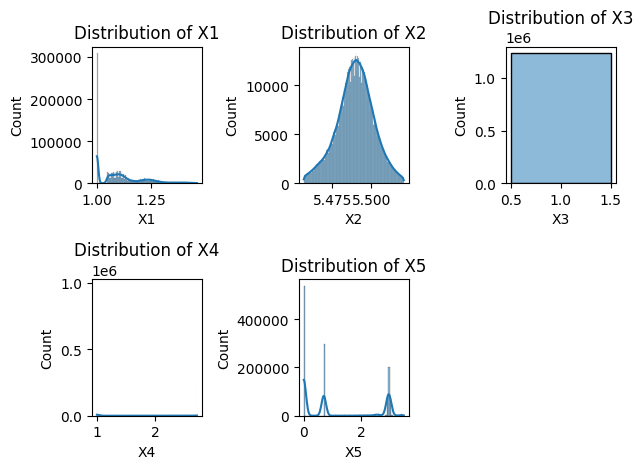

In [21]:
column = ['X1', 'X2', 'X3', 'X4', 'X5']
for i, col in enumerate(column, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

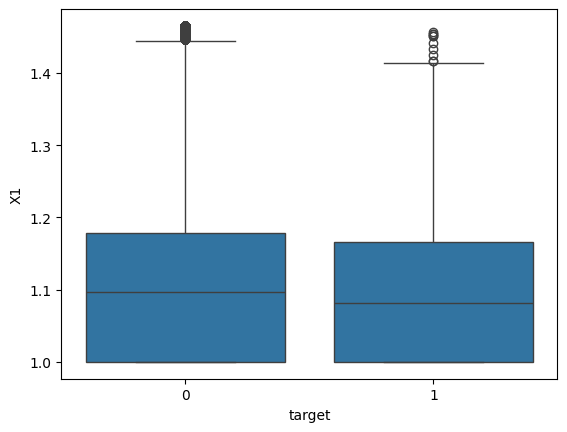

In [22]:
sns.boxplot(data=data, x='target', y='X1')
plt.show()

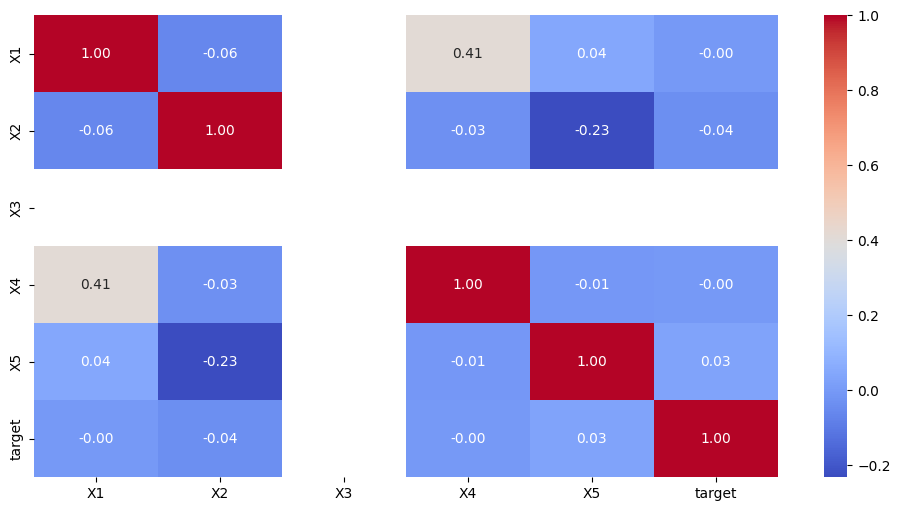

In [23]:
data2 = data.drop('Date', axis=1)

plt.figure(figsize=(12,6))
sns.heatmap(data=data2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Correlation Analysis Insights
- The dataset shows low multicollinearity among features.
- X1 and X4 have a moderate positive correlation (~0.41).
- All features show very weak linear correlation with the target variable.
- This indicates that non-linear models may be more suitable than linear models.


## Feature Engineering Techniques

In [24]:
data.columns

Index(['Date', 'X1', 'X2', 'X3', 'X4', 'X5', 'target'], dtype='object')

In [25]:
x = data.drop(['target', 'Date'], axis=1)
y = data['target']

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [27]:
ss = StandardScaler()
x_ss = ss.fit_transform(x)
x_ss = pd.DataFrame(x_ss, columns=x.columns,index=x.index)

In [28]:
x_ss.head(2)

,X1,X2,X3,X4,X5
13,1.987460,-1.417308,0.0,-0.512466,1.398632
14,0.494628,-1.445653,0.0,-0.512466,1.398632


In [29]:
ms = MinMaxScaler()
x_ms = ms.fit_transform(x)
x_ms = pd.DataFrame(x_ms, columns=x.columns,index=x.index)

In [30]:
x_ms.head(2)

,X1,X2,X3,X4,X5
13,0.700280,0.252985,0.0,0.0,0.833985
14,0.362902,0.247756,0.0,0.0,0.833985


In [31]:
rs = RobustScaler()
x_rs = rs.fit_transform(x)
x_rs = pd.DataFrame(x_rs, columns=x.columns,index=x.index)

In [32]:
x_rs.head(2)

,X1,X2,X3,X4,X5
13,1.287292,-1.135250,0.0,0.0,0.760188
14,0.406597,-1.157487,0.0,0.0,0.760188


## Model Evaluation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
svc = SVC(kernel='sigmoid', gamma=1.0, class_weight='balanced')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
lrc = LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced')
rfc = RandomForestClassifier(n_estimators=50, random_state=2, class_weight='balanced')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2, class_weight='balanced')
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2, class_weight='balanced')

In [35]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [36]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_ms, y, test_size=0.2, random_state=42)

In [37]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_ss, y, test_size=0.2, random_state=42)

In [38]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_rs, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy,precision, recall, f1

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1score = train_classifier(clf, x1_train,y1_train,x1_test,y1_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ", current_recall)
    print("F1-Score - ", current_f1score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    recall_scores.append(current_f1score)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1score = train_classifier(clf, x2_train,y2_train,x2_test,y2_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ", current_recall)
    print("F1-Score - ", current_f1score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    recall_scores.append(current_f1score)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1score = train_classifier(clf, x3_train,y3_train,x3_test,y3_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ", current_recall)
    print("F1-Score - ", current_f1score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    recall_scores.append(current_f1score)